# DESAFIO 1

## Paso 1. Abrir el dataset SATscore2015.csv. Investigar la estructura de los datos y responder

### 1. ¿Qué es lo que describen los datos?

In [1]:
import numpy as np
import pandas as pd

### 2. ¿Se ve algún problema en los datos? ¿Están completos?

In [2]:
# Read raw data
satscore_raw = pd.read_csv("./SATscore2015.csv")

satscore_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
State              53 non-null object
Mathematics        53 non-null object
Writing            53 non-null int64
Total SAT score    53 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


Los datos en la columna "Mathematics" deberían ser del tipo int64. Object indica que el contenido es mixto y hay que hacer una limpieza previa al análisis estadístico.

In [3]:
# El puntaje SAT se mide en números enteros, así que cualqiuer cosa que no
# se pueda evaluar como ese tipo, representa un problema en los datos...

def isint(column):
    for x in column:
        try:
            int(x)
            return True
        except ValueError:
            return False

# Fancy index <3 (lista de booleanos de los datos que no son enteros).
indexes = satscore_raw["Mathematics"].apply(isint)

# Eliminamos el registro inválido.
satscore_raw = satscore_raw[indexes]

# Corregimos el tipo de dato dentro del DataFrame.
satscore_raw.loc[:,"Mathematics"] = pd.to_numeric(satscore_raw["Mathematics"])

#gdp_per_state = gdp_per_state_raw.apply(lambda x: x.str.srip() if type(x) == 'str' else x).values

### 3. ¿Qué representan las filas? ¿Y las columnas?

### 4. Creá un diccionario de datos para el dataset en formato texto. En el mismo deben describirse las diferentes variables, su nivel de medición y dar alguna(s) medida(s) descriptiva(s) de cada una.

In [4]:
print("Revisamos que los datos ahora sí sean correctos...\n")

print(satscore_raw.info(),"\n")

print(satscore_raw.describe())

Revisamos que los datos ahora sí sean correctos...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 52
Data columns (total 4 columns):
State              52 non-null object
Mathematics        52 non-null int64
Writing            52 non-null int64
Total SAT score    52 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB
None 

       Mathematics     Writing  Total SAT score
count    52.000000   52.000000        52.000000
mean    532.269231  521.365385      1577.019231
std      52.353667   66.302642       150.039144
min     388.000000  412.000000      1214.000000
25%     496.250000  477.750000      1471.250000
50%     525.500000  507.000000      1552.000000
75%     577.750000  566.250000      1726.250000
max     616.000000  842.000000      1802.000000


## Paso 2. Cargar el dataset

### 5. Cargá los datos en una lista de listas

In [5]:
# Create Numpy arrays
satscore = satscore_raw.values

### 6. Visualizá (print) los datos

In [6]:
satscore

array([['Alabama', 538, 533, 1616],
       ['Alaska', 503, 482, 1494],
       ['Arizona', 527, 502, 1552],
       ['Arkansas', 569, 551, 1688],
       ['California', 506, 491, 1492],
       ['Colorado', 587, 567, 1736],
       ['Connecticut', 506, 504, 1514],
       ['Delaware', 461, 445, 1368],
       ['District of Columbia', 440, 432, 1313],
       ['Florida', 480, 468, 1434],
       ['Georgia', 485, 475, 1450],
       ['Hawaii', 508, 477, 1472],
       ['Idaho', 463, 442, 1372],
       ['Illinois', 616, 587, 1802],
       ['Indiana', 499, 478, 1473],
       ['Iowa', 600, 566, 1755],
       ['Kansas', 592, 568, 1748],
       ['Kentucky', 587, 574, 1749],
       ['Louisiana', 559, 553, 1675],
       ['Maine', 473, 451, 1392],
       ['Maryland', 493, 478, 1462],
       ['Massachusetts', 529, 507, 1552],
       ['Michigan', 609, 585, 1788],
       ['Minnesota', 607, 576, 1778],
       ['Mississippi', 563, 570, 1713],
       ['Missouri', 599, 582, 1777],
       ['Montana', 556, 538, 165

### 7. Extraé una lista de las etiquetas de los datos y removela del dataset

In [7]:
# Tomar cada columna y salvarla en su respectiva variable, como array de Numpy.
state, maths, writing, total_score = \
    [satscore_raw.get(x).values for x in satscore_raw.columns]

### 8. Creá una lista con los nombres de los Estados del dataset. (Pista: usá la lista de etiquetas como índice)

In [8]:
state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

### 9. Imprimí los tipos de cada columna

In [9]:
print("Tipo 'maths': {0}\n\
Tipo 'writing': {1}\n\
Tipo 'total_score': {2}".format(maths.dtype, writing.dtype,total_score.dtype))

Tipo 'maths': int64
Tipo 'writing': int64
Tipo 'total_score': int64


### 10. ¿Hay algún tipo que deba ser cambiado? Si es así, transformalo al tipo que corresponde

### 11. Creá un diccionario para cada columna vinculando cada Estado con su respectivo valor en esa columna

### 12. Creá un diccionario para cada una de las columnas numéricas

## Paso 3. Describir los datos

### 13. Imprimí el máximo y el mínimo de cada columna

In [10]:
print("Total Score: max = {}, min = {}"
          .format(total_score.max(), total_score.min()))
print("Mathematics: max = {}, min = {}"
         .format(maths.max(), maths.min()))
print("Writing: max = {}, min = {}"
         .format(writing.max(), writing.min()))

Total Score: max = 1802, min = 1214
Mathematics: max = 616, min = 388
Writing: max = 842, min = 412


### 14. Escribí una función que use solo lists comprehensions (no for loops) para calcular el Desvío Estándar. Imprimí el Desvío Estándar de cada columna numérica.

## Paso 4. Visualizar los datos

### 15. Usando MatPlotLib y PyPlot, graficá la distribución del Rate. ¿Qué tipo de gráfico le correspondería? ¿Por qué?

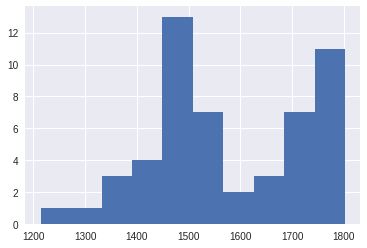

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.hist(total_score)

plt.show()

### 16. Graficá la distribución de la variable *Math*

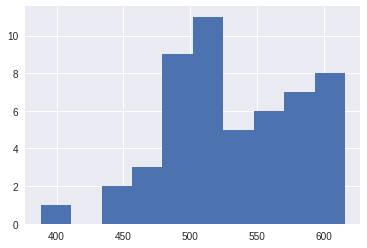

In [12]:
plt.hist(maths)

plt.show()

### 17. Graficá la distribución de la variable *Writing*

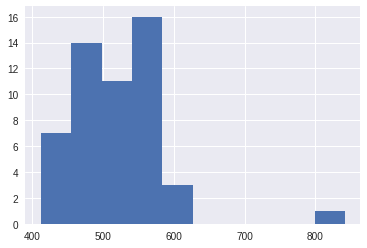

In [13]:
plt.hist(writing)

plt.show()

### 18. ¿Cuál sería un supuesto acerca de la distribución que genera los datos?

### 19. ¿Qué podrías decir de ese supuesto en relación a los datos analizados?

## BONUS: Complementá el análisis

### 20. Elegí fuentes de datos adicionales (pobreza, ingresos, población, migrantes, etc.). Analiza y grafica los datos de forma conjunta para observar posibles relaciones. 
#### Pista: chequear consignas para ir a los links con datos

In [70]:
complementary_data_raw = pd.read_excel('./complementary_data.xlsx')

data = complementary_data_raw.join(satscore_raw.set_index("State"), on="State")
data = data.dropna()
data.columns

Index(['State', 'GDP 2016', '% of Nation', 'Pop. dens.Rank',
       'Density\n(Pop.\n/ km²)', 'Pop.Rank', '2015\npopulation',
       'Immigrant \nPopulation', '% Inmigrant \nPop.', 'Land Rank',
       'Land\narea\n(km²)', 'GINI rank', 'GINI\nvalue',
       'Budget per pupil 2014', 'Mathematics', 'Writing', 'Total SAT score'],
      dtype='object')

### 21. A partir de las variables seleccionados, ¿observas una mayor incidencia de alguna de las variables y la performance del estado en alguno de los scores? ¿Consideras importante inferir alguna conclusión para orientar a los directivos de la universidad y/o profundizar el análisis?  

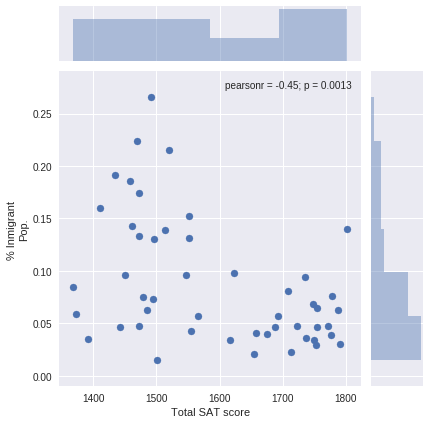

In [52]:
sns.jointplot(data["Total SAT score"], 
              data["% Inmigrant \nPop."])
plt.show()

### 22. Graficá algunos scatterplots. Usá algún gráfico de Seaborn para presentar scatterplots múltiples

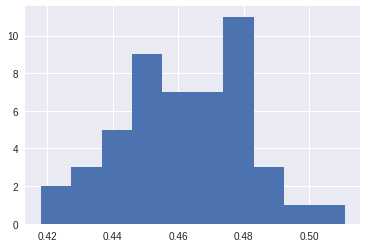

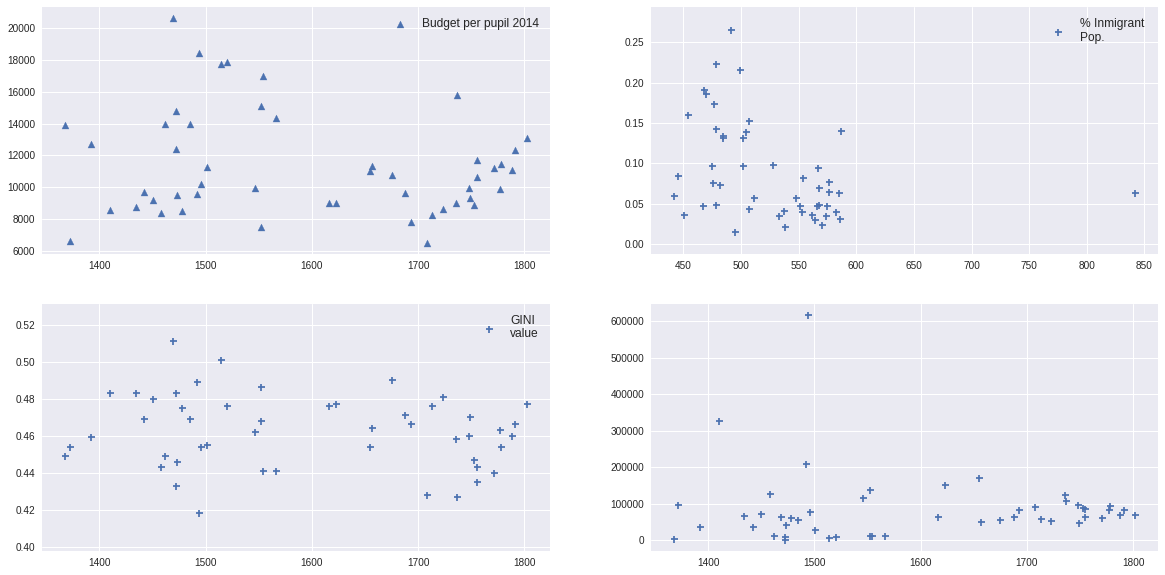

In [157]:
edu_budget_perc = data["Budget per pupil 2014"] / data["GDP 2016"]
sat_in_perc = data["Total SAT score"] / sum(data["Total SAT score"])
land_gdp_ratio = data["Land\narea\n(km²)"] * data["GINI\nvalue"]

plt.hist(data["GINI\nvalue"])

plt.figure(figsize=(20,10))

ax1 = plt.subplot(221)
ax1.scatter(data["Total SAT score"], data["Budget per pupil 2014"], marker='^')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = {l:h for l, h in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), loc = 'upper right', fontsize=12)

ax2 = plt.subplot(222)
ax2.scatter(data["Writing"], data["% Inmigrant \nPop."], marker='+')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = {l:h for l, h in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), loc = 'upper right', fontsize=12)

ax2 = plt.subplot(223)
ax2.scatter(data["Total SAT score"], data["GINI\nvalue"], marker='+')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = {l:h for l, h in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), loc = 'upper right', fontsize=12)

ax2 = plt.subplot(224)
ax2.scatter(data["Total SAT score"], land_gdp_ratio, marker='+')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = {l:h for l, h in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), loc = 'upper right', fontsize=12)

plt.show()


### 23. ¿Hay alguna relación interesante para mencionar? ¿Cuál? ¿Qué tipo de relación es?

### 24. Creá boxplots para cada variable (según corresponda)